In [24]:
import pandas as pd
df = pd.read_csv('postgres_public_data_officer.csv', usecols= ['id','last_unit_id'])
df.head(4)

,id,last_unit_id
0,32312,151
1,32358,151
2,2680,83
3,1791,53


In [28]:
from collections import defaultdict
d = defaultdict(list)
for row in df.iloc():
    officer_id = row[0]
    unit_id = row[1]
    if unit_id in d:
        d[unit_id].append(officer_id)
    else:
        d[unit_id] = [officer_id]

In [35]:
open('combination.txt', 'w').close()
for key in d.keys():
    officerIds = d[key]
    ids = []
    f = open("combination.txt", "a")
    for one in officerIds:
        for two in officerIds:
            if one == two:
                continue
            else:
                ids.append(str(one) + ' ' + str(two) + ' \n')
    f.writelines(ids)
    f.close()

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [38]:
fb = nx.read_edgelist('combination.txt', create_using=nx.Graph(), nodetype=str)
print(nx.info(fb))

Name: 
Type: Graph
Number of nodes: 29894
Number of edges: 8841868
Average degree: 591.5480


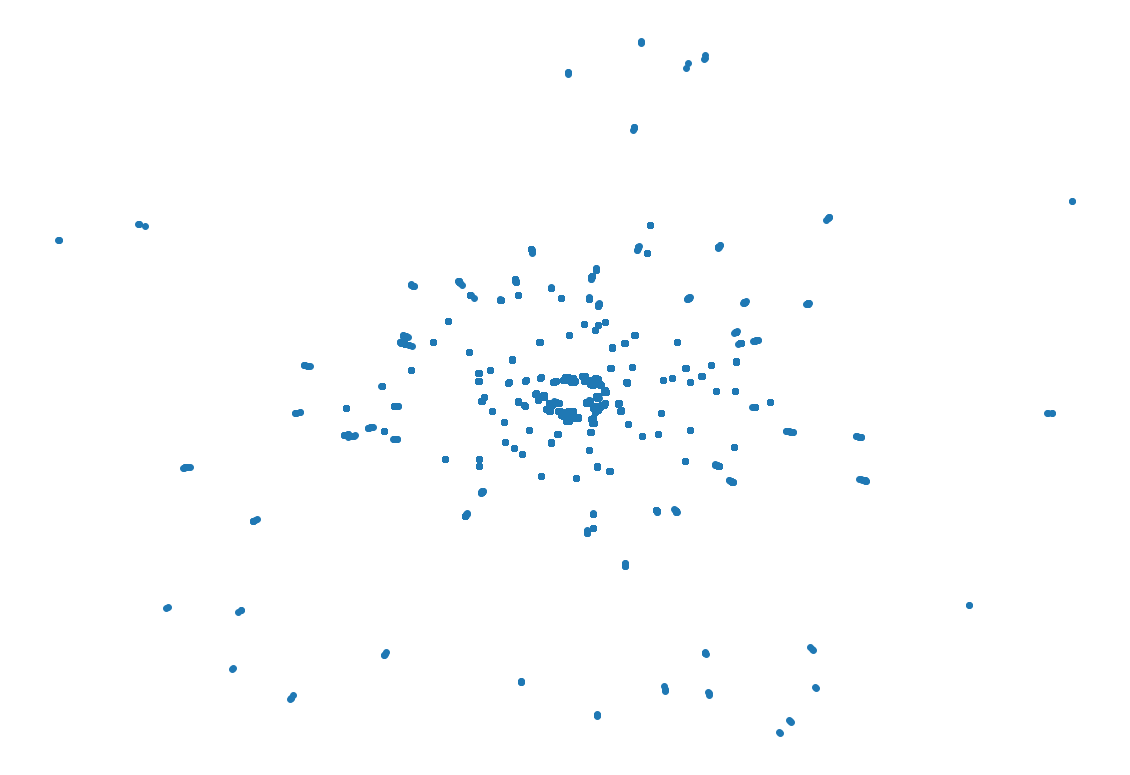

In [43]:
# create a spring-layout of fb
pos = nx.spring_layout(fb)

plt.figure(figsize=(20,14))

plt.axis('off')

nx.draw_networkx(fb, pos=pos, with_labels=False, node_size=35)

In [44]:
print(nx.betweenness_centrality(fb, normalized=True))

{'32312': 0.0, '32358': 0.0, '32113': 0.0, '32144': 0.0, '32371': 0.0, '31849': 0.0, '31800': 0.0, '32031': 0.0, '31807': 0.0, '31989': 0.0, '31933': 0.0, '32179': 0.0, '25608': 0.0, '32259': 0.0, '32335': 0.0, '32077': 0.0, '32361': 0.0, '32403': 0.0, '20098': 0.0, '32110': 0.0, '31871': 0.0, '32385': 0.0, '32301': 0.0, '31973': 0.0, '20855': 0.0, '32372': 0.0, '31791': 0.0, '17857': 0.0, '31991': 0.0, '6493': 0.0, '5137': 0.0, '20168': 0.0, '31812': 0.0, '32156': 0.0, '20704': 0.0, '32422': 0.0, '32112': 0.0, '32395': 0.0, '31966': 0.0, '32102': 0.0, '31912': 0.0, '31885': 0.0, '32396': 0.0, '32303': 0.0, '2680': 0.0, '7380': 0.0, '29105': 0.0, '16307': 0.0, '17348': 0.0, '22003': 0.0, '17193': 0.0, '26950': 0.0, '25367': 0.0, '14331': 0.0, '218': 0.0, '17655': 0.0, '4426': 0.0, '24893': 0.0, '24166': 0.0, '5029': 0.0, '21839': 0.0, '17662': 0.0, '30657': 0.0, '28426': 0.0, '13253': 0.0, '8675': 0.0, '26229': 0.0, '5896': 0.0, '3904': 0.0, '26122': 0.0, '3255': 0.0, '26740': 0.0, '19

In [45]:
print(fb.degree()) # find the number of degree

[('32312', 43), ('32358', 43), ('32113', 43), ('32144', 43), ('32371', 43), ('31849', 43), ('31800', 43), ('32031', 43), ('31807', 43), ('31989', 43), ('31933', 43), ('32179', 43), ('25608', 43), ('32259', 43), ('32335', 43), ('32077', 43), ('32361', 43), ('32403', 43), ('20098', 43), ('32110', 43), ('31871', 43), ('32385', 43), ('32301', 43), ('31973', 43), ('20855', 43), ('32372', 43), ('31791', 43), ('17857', 43), ('31991', 43), ('6493', 43), ('5137', 43), ('20168', 43), ('31812', 43), ('32156', 43), ('20704', 43), ('32422', 43), ('32112', 43), ('32395', 43), ('31966', 43), ('32102', 43), ('31912', 43), ('31885', 43), ('32396', 43), ('32303', 43), ('2680', 371), ('7380', 371), ('29105', 371), ('16307', 371), ('17348', 371), ('22003', 371), ('17193', 371), ('26950', 371), ('25367', 371), ('14331', 371), ('218', 371), ('17655', 371), ('4426', 371), ('24893', 371), ('24166', 371), ('5029', 371), ('21839', 371), ('17662', 371), ('30657', 371), ('28426', 371), ('13253', 371), ('8675', 37

In [51]:
# find the order and size of our network
print(fb.order())
print(fb.size())

29894
8841868


In [53]:
# find the number of triangles in the network
print(nx.triangles(fb))

{'32312': 903, '32358': 903, '32113': 903, '32144': 903, '32371': 903, '31849': 903, '31800': 903, '32031': 903, '31807': 903, '31989': 903, '31933': 903, '32179': 903, '25608': 903, '32259': 903, '32335': 903, '32077': 903, '32361': 903, '32403': 903, '20098': 903, '32110': 903, '31871': 903, '32385': 903, '32301': 903, '31973': 903, '20855': 903, '32372': 903, '31791': 903, '17857': 903, '31991': 903, '6493': 903, '5137': 903, '20168': 903, '31812': 903, '32156': 903, '20704': 903, '32422': 903, '32112': 903, '32395': 903, '31966': 903, '32102': 903, '31912': 903, '31885': 903, '32396': 903, '32303': 903, '2680': 68635, '7380': 68635, '29105': 68635, '16307': 68635, '17348': 68635, '22003': 68635, '17193': 68635, '26950': 68635, '25367': 68635, '14331': 68635, '218': 68635, '17655': 68635, '4426': 68635, '24893': 68635, '24166': 68635, '5029': 68635, '21839': 68635, '17662': 68635, '30657': 68635, '28426': 68635, '13253': 68635, '8675': 68635, '26229': 68635, '5896': 68635, '3904': 6

In [54]:
print(nx.clustering(fb))

{'32312': 1.0, '32358': 1.0, '32113': 1.0, '32144': 1.0, '32371': 1.0, '31849': 1.0, '31800': 1.0, '32031': 1.0, '31807': 1.0, '31989': 1.0, '31933': 1.0, '32179': 1.0, '25608': 1.0, '32259': 1.0, '32335': 1.0, '32077': 1.0, '32361': 1.0, '32403': 1.0, '20098': 1.0, '32110': 1.0, '31871': 1.0, '32385': 1.0, '32301': 1.0, '31973': 1.0, '20855': 1.0, '32372': 1.0, '31791': 1.0, '17857': 1.0, '31991': 1.0, '6493': 1.0, '5137': 1.0, '20168': 1.0, '31812': 1.0, '32156': 1.0, '20704': 1.0, '32422': 1.0, '32112': 1.0, '32395': 1.0, '31966': 1.0, '32102': 1.0, '31912': 1.0, '31885': 1.0, '32396': 1.0, '32303': 1.0, '2680': 1.0, '7380': 1.0, '29105': 1.0, '16307': 1.0, '17348': 1.0, '22003': 1.0, '17193': 1.0, '26950': 1.0, '25367': 1.0, '14331': 1.0, '218': 1.0, '17655': 1.0, '4426': 1.0, '24893': 1.0, '24166': 1.0, '5029': 1.0, '21839': 1.0, '17662': 1.0, '30657': 1.0, '28426': 1.0, '13253': 1.0, '8675': 1.0, '26229': 1.0, '5896': 1.0, '3904': 1.0, '26122': 1.0, '3255': 1.0, '26740': 1.0, '19

(array([1.147e+03, 1.400e+01, 4.000e+00, 7.000e+00, 1.100e+01, 6.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  158.6,  317.2,  475.8,  634.4,  793. ,  951.6, 1110.2,
        1268.8, 1427.4, 1586. ]),
 <BarContainer object of 10 artists>)

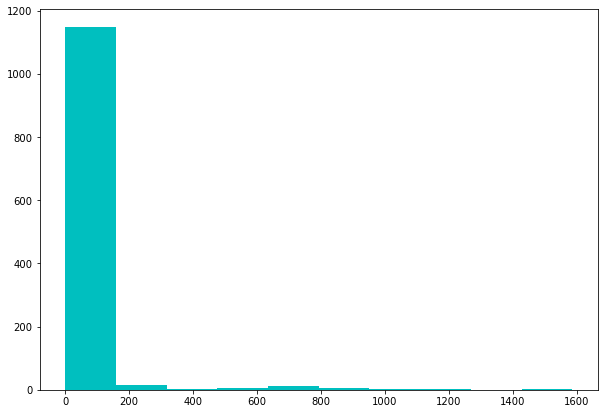

In [55]:
# draw histogram of degrees
plt.figure(figsize=(10,7))
hst = nx.degree_histogram(fb)
plt.hist(hst, bins=10, color='c')

<BarContainer object of 29894 artists>

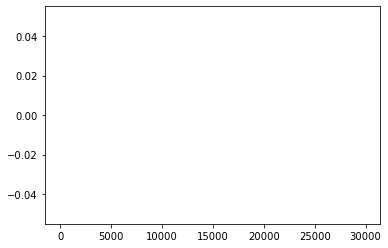

In [56]:
# draw a bar chart of the betweenness centrality
bc = nx.betweenness_centrality(fb)
plt.bar(range(len(bc)), bc.values(), align='center')